In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from IPython.display import clear_output

from skimage.segmentation import mark_boundaries, slic as skimage_slic
from scipy.stats import entropy as scipy_entropy
from slic import slic
from segmentation import patch_extraction

100%|██████████| 798/798 [00:04<00:00, 186.97it/s]


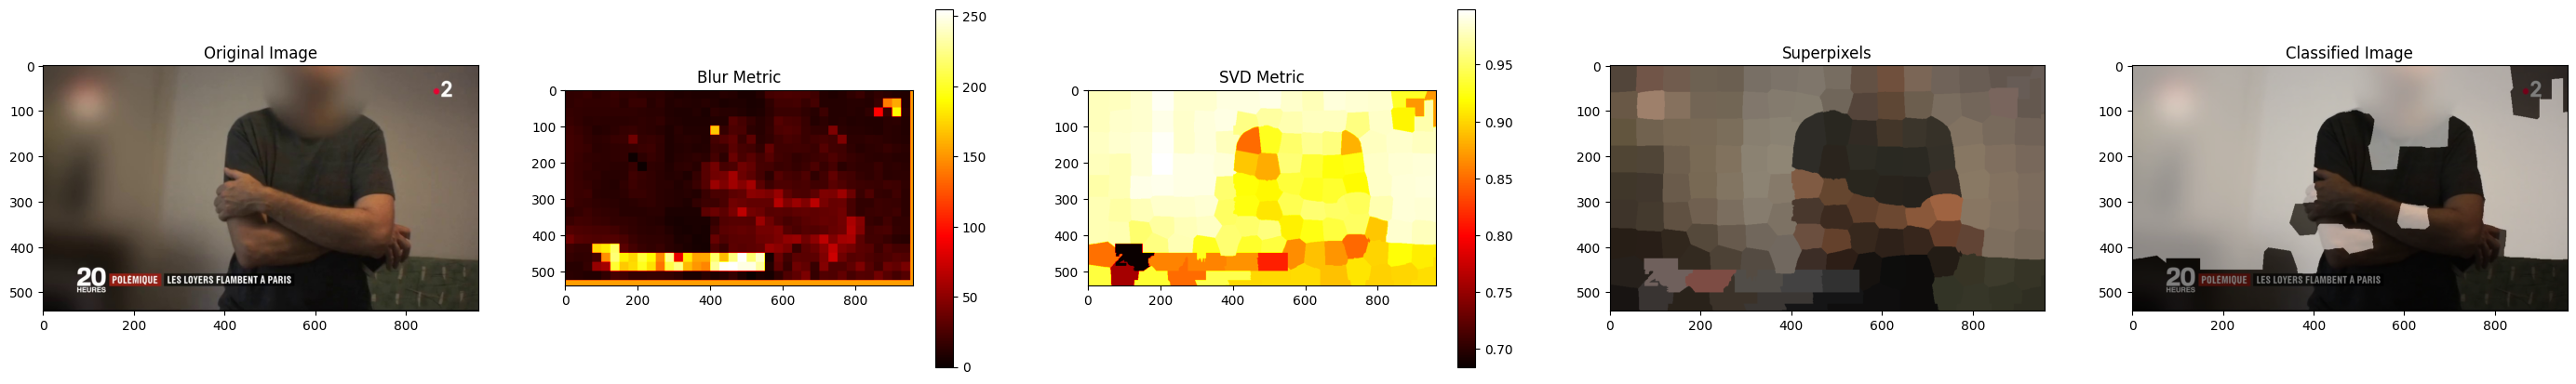

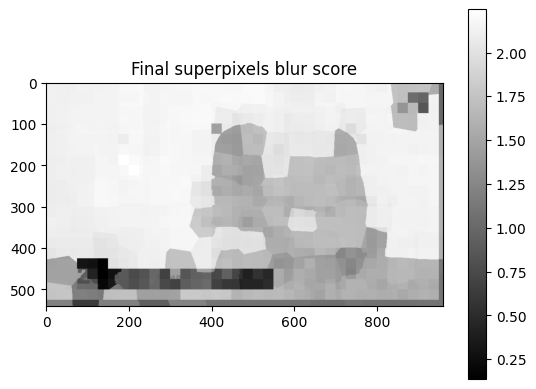

10 squares of size 180 found


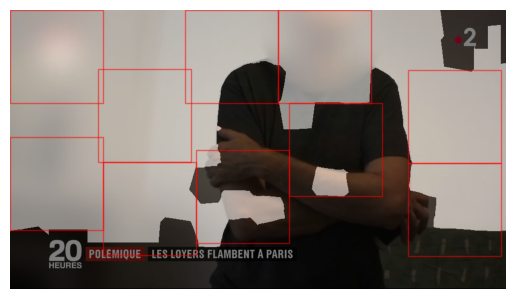

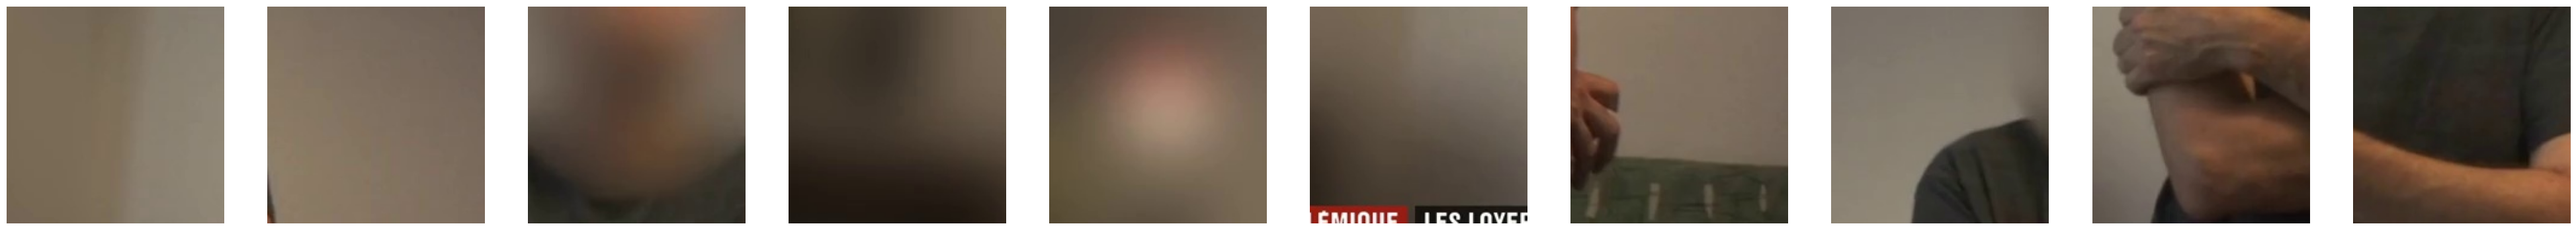

In [2]:
img_path = '/home/msouda/Datasets/true_anonymized/fr2_20180718T200950/fr2_20180718T200950_s054_f0.jpg'
img = Image.open(img_path)

segments, patch_labels, classes, SVD, D, max_squares, squares, _classes = patch_extraction.produce_patches(img)


In [169]:
model = SAlexNet(num_classes=5, input_size=128)
print(f"Simplified AlexNet model with parameters: {sum(p.numel() for p in model.parameters())}")
model.load_state_dict(torch.load('/home/msouda/Workspace/models/SFA8.pth'))

Simplified AlexNet model with parameters: 1342245


<All keys matched successfully>

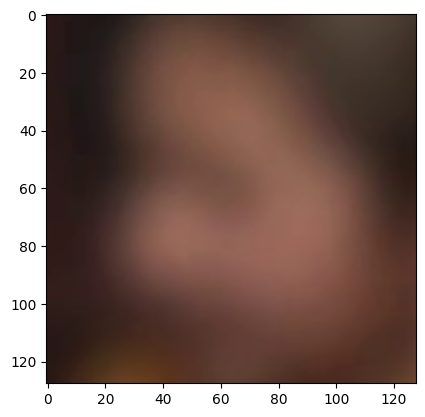

tensor([[ 108.3197,   50.7661,  -63.6949, -140.3554,   45.4442]])
Patch 0 prediction: 0


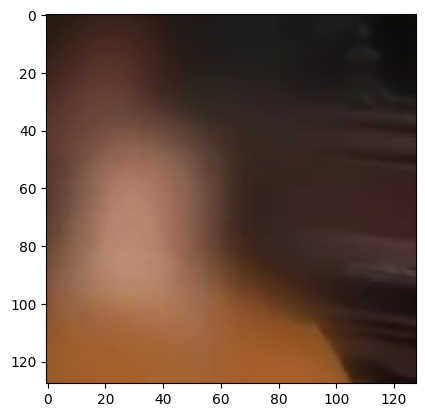

tensor([[ 281.1840,   60.6758, -122.5262,  -82.4650, -136.4294]])
Patch 1 prediction: 0


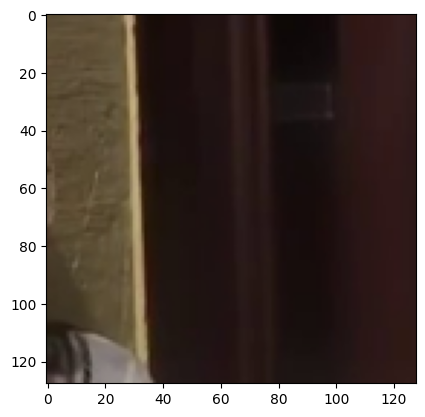

tensor([[ 691.3268,  359.2435, -448.3117, -306.9381, -294.3683]])
Patch 2 prediction: 0


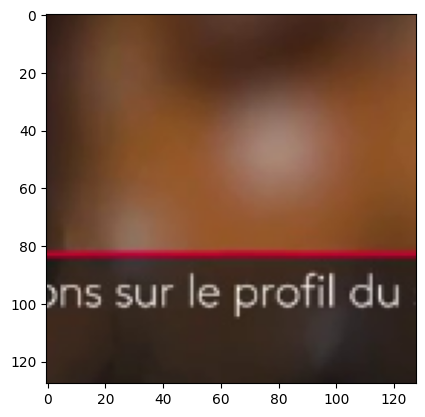

tensor([[ 943.9976,   72.9960, -373.4192, -370.4926, -270.6143]])
Patch 3 prediction: 0


In [171]:
patch_pred = {}
model.eval()
plt.imshow(img)
plt.axis('off')
plt.show()

with torch.no_grad():
    for i, square in enumerate(squares):
        
        square = cv2.resize(square, (128, 128))
        #square = cv2.resize(square[60:100, 60:100], (128, 128))
        plt.imshow(square)
        plt.show()
        #display_fourier_spectrum(cv2.cvtColor(square, cv2.COLOR_RGB2GRAY))
        square = torch.tensor(square).permute(2, 0, 1).unsqueeze(0).float()
        output = model(square)
        print(output)
        print(f"Patch {i} prediction: {output[0,:].argmax().item()}")

In [35]:
def display_fourier_spectrum(img, name = 'Input_image'):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    plt.figure(figsize = (15,10))
    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title(name), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()
    return magnitude_spectrum

In [34]:
count = 0

128
15 5
alpha_0: 0.3033874273339733


100%|██████████| 493/493 [00:01<00:00, 342.98it/s]


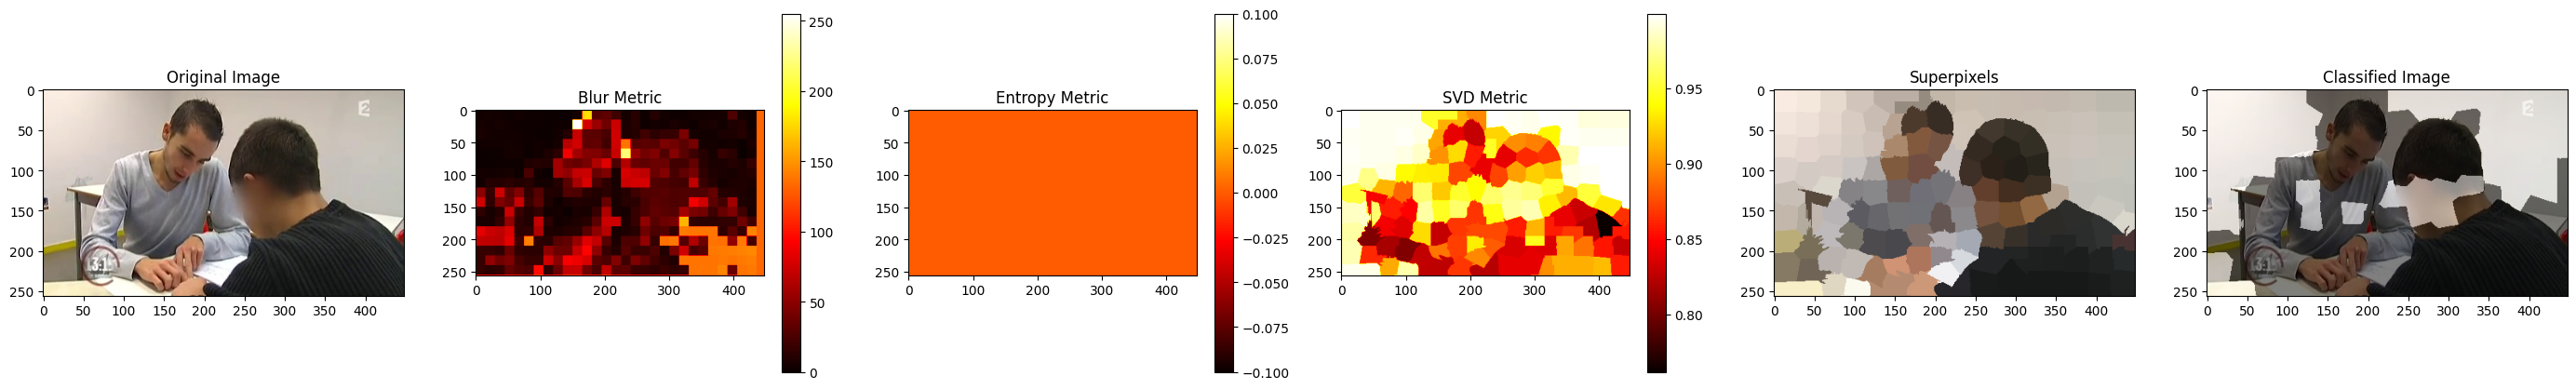

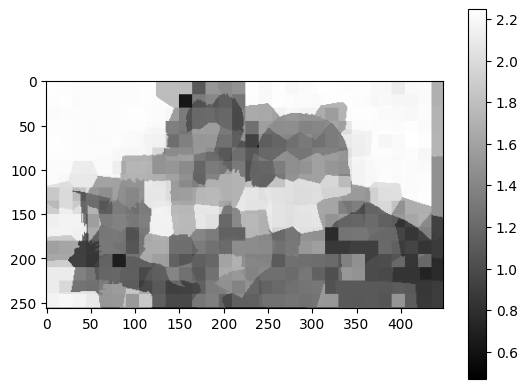

n_square: 4


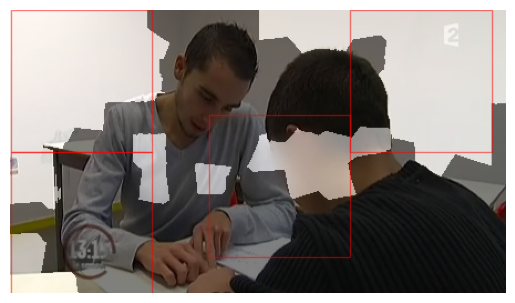

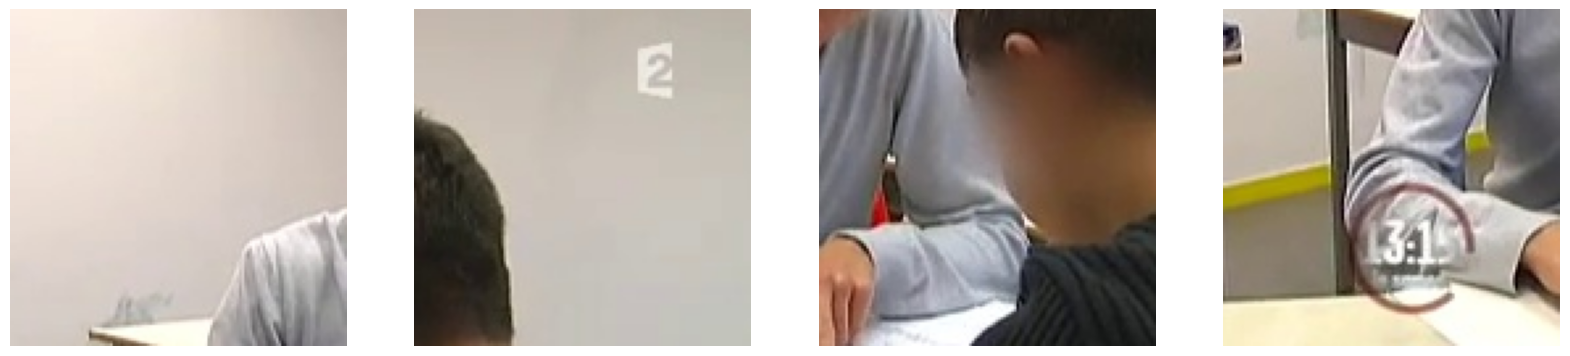

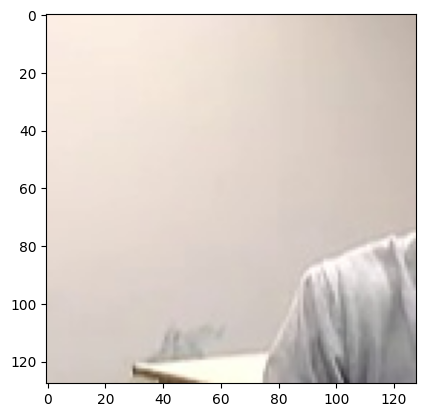

tensor([[ 344.5657, -159.7387,  201.1092, -749.3974,  366.5728]])
Patch 0 prediction: 4


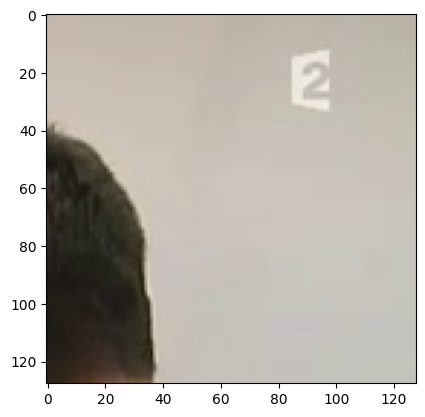

tensor([[ 821.3412, -229.7591,  197.1459, -852.0472,   67.2408]])
Patch 1 prediction: 0


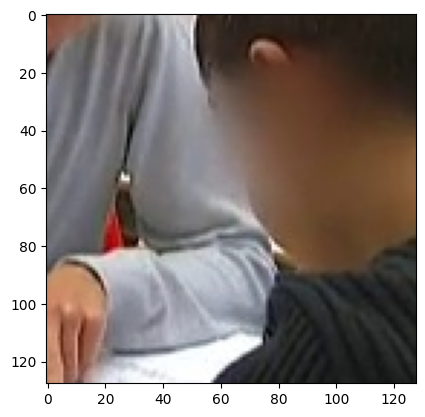

tensor([[1029.9464,  165.6581,  -98.2400, -774.9468, -320.5886]])
Patch 2 prediction: 0


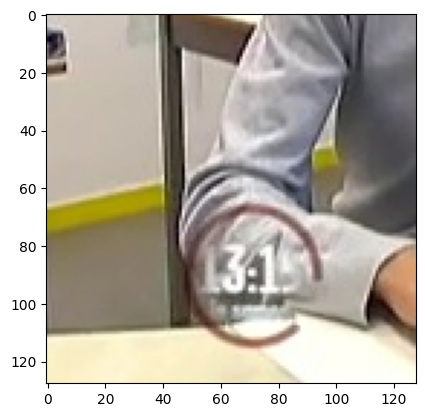

tensor([[ 2934.1450,  -337.7840,  -837.8724, -1310.3979,  -442.9895]])
Patch 3 prediction: 0


In [43]:
patch_pred = {}
model.eval()
with torch.no_grad():
    while count < 350:
    #i = np.random.randint(0, len(synth))
        x = np.random.choice([0, 1])
        if x == 0:
            img_path = _annotations.loc[count, 'filename']
        else:
            img_path = annotations.loc[count, 'filename']
        #img_path = '/home/msouda/Datasets/caltech-101/101_ObjectCategories_blurred_4/accordion_image_0001.jpg'
        img = Image.open(img_path)
        # plt.imshow(img)
        # plt.axis('off')
        # plt.show()
        # np.array(img).shape
        count += 1
        segments, patch_labels, classes, SVD, D, max_squares, squares, _classes = produce_patches(img)
        predictions = []
        for i, square in enumerate(squares):
        
            square = cv2.resize(square, (128, 128))
            #square = cv2.resize(square[60:100, 60:100], (128, 128))
            plt.imshow(square)
            plt.show()
            square = torch.tensor(square).permute(2, 0, 1).unsqueeze(0).float()
            output = model(square)
            print(output)
            print(f"Patch {i} prediction: {output[0,:].argmax().item()}")
            predictions.append(output[0,:].argmax().item())
        
        patch_pred[count] = {
            'img_path': img_path,
            'max_squares': max_squares,
            'predictions': predictions,
            'label': x
        }
        clear_output(wait=True)
        